<h1>Data Science Fundamentals - Homework 3</h1>

Charuta Pethe - 111424850 <br/>
Deven Shah - 111482331 <br/>
Neha Mane - 111491083

<h1>Question 1</h1>

In [1]:
import numpy as np 
import pandas as pd
import scipy as sp
from pandas import Series,DataFrame
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
import sklearn
from scipy.cluster.hierarchy import fclusterdata
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

/Users/charuta/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Read properties CSV
properties = pd.read_csv('/Users/charuta/Documents/SBU/Academics/Semester_1/Data_Science/Homework_3/properties_2017.csv')

/Users/charuta/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<h3>In our scoring function, we have used bedroomcount, calculatedfinishedsquarefeet, and regionidcounty to calculate the score of each house. </h3>
<h3>The reason behind taking these features is that as the number of bedrooms or area of the house increases, the desirability of the house is also expected to increase. Similarly, higher the tax amount in a region, better is the living environment of the house.</h3>

<h3>We have considered the property type "Single Family Residential" for the scoring, as these account for the most number of houses in the entire dataset (~ 2,200,000 houses), and scoring only one type of house avoids apple-to-orange comparisons.</h3>

In [3]:
#Calculate scoring function based on bedroomcount, calculatedfinishedsquarefeet, regionidcounty

#Considers Single Family Residential houses
houses_to_take = [261] 
temp = properties.loc[properties.propertylandusetypeid.isin(houses_to_take)]

score = temp[['parcelid', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'regionidcounty']]
score = score.dropna(axis=0, how='any')
score = score[score.bedroomcnt != 0]

### We plotted the data, which revealed outliers. We removed these from the dataset before scoring.

In [4]:
#Removes outliers from the data
score = score.drop([1176033, 2338929])

In [5]:
#Calculates zscore of the selected features
score['zscorebedroomcnt'] = stats.zscore(score.bedroomcnt)
score['zscorecalculatedfinishedsquarefeet'] = stats.zscore(score.calculatedfinishedsquarefeet)
score['rankRegion'] = score.regionidcounty

#Ranks the county in non-decreasing manner of mean tax value of the houses
score['rankRegion'].replace(3101.0, 1, inplace=True)
score['rankRegion'].replace(2061.0, 2, inplace=True)
score['rankRegion'].replace(1286.0, 3, inplace=True)
score['zscorerankRegion'] = stats.zscore(score.rankRegion)

#The final score is a sum of all the zscores
score['finalscore'] = score.zscorebedroomcnt + score.zscorecalculatedfinishedsquarefeet + score.zscorerankRegion
score = score.sort_values(by=['finalscore'], ascending = False)

<h3>10 most desirable houses according to our scoring function</h3>

In [6]:
score.head(10)

,parcelid,bedroomcnt,calculatedfinishedsquarefeet,regionidcounty,zscorebedroomcnt,zscorecalculatedfinishedsquarefeet,rankRegion,zscorerankRegion,finalscore
735349,11642367,11.0,52503.0,3101.0,8.343401,52.490633,1.0,-0.680719,60.153315
1150394,10913049,3.0,59220.0,3101.0,-0.333578,59.453208,1.0,-0.680719,58.438912
1839381,11645264,6.0,45891.0,3101.0,2.920289,45.636897,1.0,-0.680719,47.876467
2296330,11645396,10.0,39170.0,3101.0,7.258778,38.670176,1.0,-0.680719,45.248235
1316928,11641900,12.0,35046.0,3101.0,9.428023,34.395401,1.0,-0.680719,43.142705
2300984,11654951,18.0,26116.0,3101.0,15.935756,25.138918,1.0,-0.680719,40.393956
2360588,11639520,8.0,35796.0,3101.0,5.089534,35.172821,1.0,-0.680719,39.581636
2882442,11688909,5.0,37634.0,3101.0,1.835667,37.078019,1.0,-0.680719,38.232967
819933,11655017,11.0,31335.0,3101.0,8.343401,30.548726,1.0,-0.680719,38.211408
1341730,11645393,7.0,35378.0,3101.0,4.004911,34.739539,1.0,-0.680719,38.063732


<h3>10 least desirable houses according to our scoring function</h3>

In [7]:
#Top 10 least desirable houses according to our scoring function
score.tail(10)

,parcelid,bedroomcnt,calculatedfinishedsquarefeet,regionidcounty,zscorebedroomcnt,zscorecalculatedfinishedsquarefeet,rankRegion,zscorerankRegion,finalscore
107816,11329199,1.0,128.0,3101.0,-2.502822,-1.799209,1.0,-0.680719,-4.982750
1077058,11377029,1.0,120.0,3101.0,-2.502822,-1.807501,1.0,-0.680719,-4.991042
1733745,11376998,1.0,120.0,3101.0,-2.502822,-1.807501,1.0,-0.680719,-4.991042
2627828,11376961,1.0,108.0,3101.0,-2.502822,-1.819940,1.0,-0.680719,-5.003481
2061688,11376960,1.0,108.0,3101.0,-2.502822,-1.819940,1.0,-0.680719,-5.003481
506194,12017342,1.0,105.0,3101.0,-2.502822,-1.823050,1.0,-0.680719,-5.006591
1852933,11292857,1.0,96.0,3101.0,-2.502822,-1.832379,1.0,-0.680719,-5.015920
1137975,11651552,1.0,3.0,3101.0,-2.502822,-1.928779,1.0,-0.680719,-5.112320
557780,12049240,1.0,3.0,3101.0,-2.502822,-1.928779,1.0,-0.680719,-5.112320
1768213,12586087,1.0,1.0,3101.0,-2.502822,-1.930852,1.0,-0.680719,-5.114393


# Question 2

### We have defined the function distanceMetric which takes the records of two houses, calculates the pairwise distance between them and returns it.

We calculate the pairwise distance as the summation of:<br/>

Difference in Z-scores of bedroomcnt of two houses <br/>
Difference in Z-scores of calculatedfinishedsquarefeet of two houses<br/>
Difference in rank of the counties(regionidcounty) of the two houses<br/>

Further, we add 1 to the distance if the zipcodes of the two houses are different.


In [8]:
#DistanceMetric function returns the absolute difference between each feature of the house
def distanceMetric(house1, house2):
    
    bedroomDist = abs(house1[0] - house2[0])
    
    sqftDist = abs(house1[1] - house2[1])
    
    rankDist = abs(house1[2] - house2[2])
    
    distance = bedroomDist + sqftDist + rankDist
    
    if house1[3] != house2[3]:
        distance = distance + 1
    
    return np.abs(distance)

### Test call to distance function

In [9]:
#Calls the distance function to calculate the distance between the same house
for index, row in score.iterrows():
    house = row
    for index2, row2 in score.iterrows():
        house2 = row2
        #print(distanceMetric(house, house2))
        break
    break

# Question 3

### Using the above distance function, hierarchical clustering is performed and the results are plotted with a different color for each cluster.

In [10]:
score = temp[['parcelid', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'regionidcounty', 'regionidzip', 'latitude', 'longitude']]
score = score.dropna(axis=0, how='any')
score = score[score.bedroomcnt != 0]

score['zscorebedroomcnt'] = stats.zscore(score.bedroomcnt)
score['zscorecalculatedfinishedsquarefeet'] = stats.zscore(score.calculatedfinishedsquarefeet)
score['rankRegion'] = score.regionidcounty
score['rankRegion'].replace(3101.0, 1, inplace=True)
score['rankRegion'].replace(2061.0, 2, inplace=True)
score['rankRegion'].replace(1286.0, 3, inplace=True)
score['zscorerankRegion'] = stats.zscore(score.rankRegion)

In [11]:
#Includes zscores and geographical variables
score2 = score[['zscorebedroomcnt', 'zscorecalculatedfinishedsquarefeet', 'zscorerankRegion', 'regionidzip', 'latitude', 'longitude']]
score2 = score2[0:2100000:350]
score3 = np.matrix(score2)

#Clusters the data into 50 clusters using the distance function
clusterModel = fclusterdata(score3, 50, criterion='maxclust', metric=distanceMetric)

In [12]:
#Stores the cluster variables
dataFrame = pd.DataFrame(score3, columns=list('uvwxyz'))
dataFrame['clusterValue'] = clusterModel

In [13]:
#Calculates latitude and longitude values
dataFrame['y'] = dataFrame['y'] / 1000000
dataFrame['z'] = dataFrame['z'] / 1000000

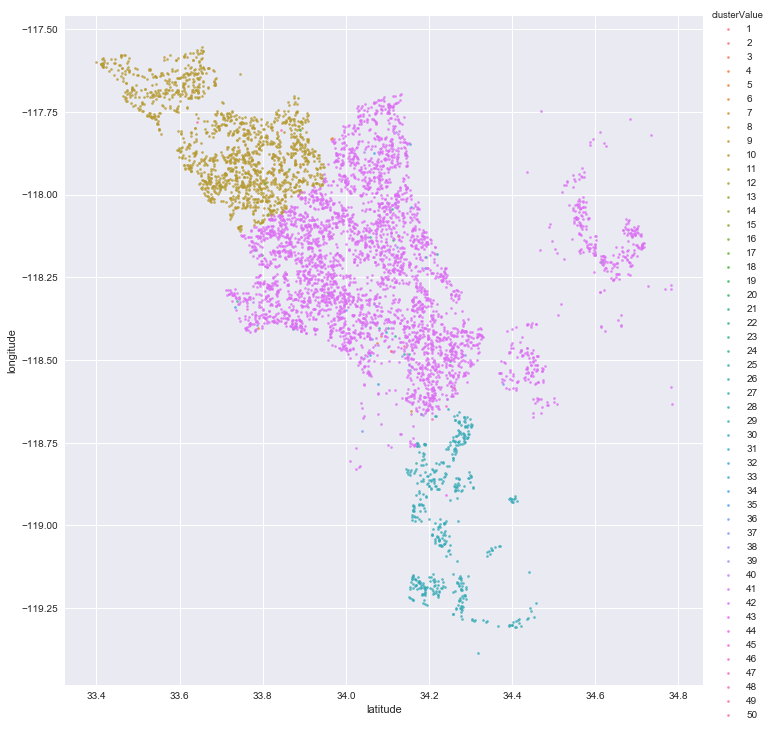

In [15]:
#Plots the cluster
g = sns.lmplot(x = 'y', y = 'z', data=dataFrame, hue='clusterValue', fit_reg=False, size=10, scatter_kws={"s": 7})
g = g.set_axis_labels("latitude", "longitude")

# Question 4

### The code in the subsequent cells has been executed separately, as it takes a long time to run, and has a limit of 2500 requests per IP address for Google Geocoder.

#### Get the city corresponding to regionidzip

In [ ]:
to_drop_duplicates = DataFrame(data=properties[['latitude', 'longitude', 'regionidzip']])

# drop records having same regionidzip
to_drop_duplicates = to_drop_duplicates.drop_duplicates(subset='regionidzip')
to_drop_duplicates = to_drop_duplicates.dropna()
to_drop_duplicates = DataFrame(data=to_drop_duplicates).astype(int)

# Converted latitude and longitude to its actual values
to_drop_duplicates.latitude = to_drop_duplicates.latitude / 1000000
to_drop_duplicates.longitude = to_drop_duplicates.longitude / 1000000
to_drop_duplicates['zipcode'] = 0
to_drop_duplicates['city'] = ""
to_drop_duplicates['county'] = ""

# Fetched postal code, city and county using the latitude and longitude of the houses with the help of Google Geocoder
for i, rows in to_drop_duplicates.iterrows():
    str_lat_lon = str(to_drop_duplicates.latitude[i]) + ", " + str(to_drop_duplicates.longitude[i])
    location = geocoder.google([to_drop_duplicates.latitude[i], to_drop_duplicates.longitude[i]], method = 'reverse')
    try:
        to_drop_duplicates.zipcode[i] = location.postal
        to_drop_duplicates.city[i] = location.city
        to_drop_duplicates.county[i] = location.county
    except:
        print(i)
        print(str_lat_lon)
        
to_drop_duplicates.to_csv('regionidzip_zipcode_from_google.csv')

#### Created two dictionaries having regionidzip as the key and city and original postal code as its values.

In [18]:
to_drop_duplicates = pd.read_csv('/Users/charuta/Documents/SBU/Academics/Semester_1/Data_Science/Homework_3/regionidzip_zipcode_from_google.csv')

to_drop_duplicates = to_drop_duplicates.dropna()

region_city_mapping = dict()
for index, row in to_drop_duplicates.iterrows():
    if row.regionidzip not in region_city_mapping.keys():
        region_city_mapping[row.regionidzip] = row.city

zip_region_mapping = dict()
for index, row in to_drop_duplicates.iterrows():
    if row.regionidzip not in zip_region_mapping.keys():
        zip_region_mapping[row.regionidzip] = int(row.zipcode)

### Fetched postal code, city and county of the houses which do not have regionidzip, using latitude and longitude as parameters to Google Geocoder

In [ ]:
temp = properties[np.isnan(properties.regionidzip)]
temp = temp[['latitude', 'longitude', 'regionidzip']]
temp = temp.dropna(subset=['longitude'])
temp.regionidzip = 0
temp = DataFrame(data = temp).astype(int)

temp['zipcode'] = 0
temp['city'] = ""
temp['county'] = ""

count = 0
templist = []
for index, row in temp.iterrows():
    if [temp.latitude[index], temp.longitude[index]] in templist:
        continue
    count = count + 1
    if count > 2500:
        break
    try:
        location = geocoder.google([temp.latitude[index], temp.longitude[index]], method = 'reverse')
        templist.append([temp.latitude[index], temp.longitude[index]])
        temp.zipcode[index] = location.postal
        temp.city[index] = location.city
        temp.county[index] = location.county
    except:
        print(index)
        print(temp.latitude[index], " ", temp.longitude[index])

### External data set consists of crime statistics of cities in California

In [16]:
crime_data = pd.read_csv('/Users/charuta/Documents/SBU/Academics/Semester_1/Data_Science/Homework_3/ca_offenses_by_city.csv')

### Created two dictionaries with city as key, and crime count and population as values

In [17]:
#Maps crime rates and city's population to each city in our data

city_crime_count = dict()
city_population = dict()

crime_data['total_crimes'] = 0
for index, row in crime_data.iterrows():
    crime_data.total_crimes[index] = crime_data['Violent crime'][index] + crime_data['Murder and nonnegligent manslaughter'][index] + crime_data['Rape (revised definition)'][index] + crime_data['Rape (legacy definition)'][index] + crime_data['Robbery'][index] + crime_data['Aggravated assault'][index] + crime_data['Property crime'][index] + crime_data['Burglary'][index] + crime_data['Larceny-theft'][index] + crime_data['Motor vehicle theft'][index]
    city_crime_count[row.City.lower()] = row['Violent crime'] + row['Murder and nonnegligent manslaughter'] + row['Rape (revised definition)'] + row['Rape (legacy definition)'] + row['Robbery'] + row['Aggravated assault'] + row['Property crime'] + row['Burglary'] + row['Larceny-theft'] + row['Motor vehicle theft']
    city_population[row.City.lower()] = row.Population

/Users/charuta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


### Merged city names with properties data based on regionidzip

In [19]:
properties_temp = properties

r2 = pd.DataFrame(list(region_city_mapping.items()), columns=['regionidzip', 'city']) 

properties_temp = properties_temp.merge(r2, on='regionidzip', how='left')

In [20]:
to_use_final = pd.read_csv('/Users/charuta/Documents/SBU/Academics/Semester_1/Data_Science/Homework_3/to_use_final.csv')

### Merged city names with properties data based on latitude and longitude

In [21]:
r3 = pd.DataFrame(data = to_use_final, columns=['latitude', 'longitude', 'city']) #Converts dictionary to dataframe
properties_temp = properties_temp.merge(r3, on=['latitude', 'longitude'], how='left')

In [22]:
#Drops data that doesn't have latitude longitude
prop2 = properties_temp.dropna(subset = ['latitude'])

#Renames city column
prop2 = prop2.drop('city_y', 1)
prop2 = prop2.rename(columns={'city_x': 'city'})

### Merged crime count with properties dataset based on city names

In [23]:
r4 = pd.DataFrame(list(city_crime_count.items()), columns=['city', 'crime_count'])
prop3 = prop2.merge(r4, on='city', how='left')

### Merged population with properties dataset based on city names

In [24]:
r5 = pd.DataFrame(list(city_population.items()), columns=['city', 'population'])
prop4 = prop3.merge(r5, on='city', how='left')

In [25]:
#Properties dataset with external crime and population data
prop4.to_csv('properties_2016_city_crime_population.csv')

# Question 5

In [2]:
properties = pd.read_csv('./properties_2016_city_crime_population.csv')
train_df = pd.read_csv('/Users/charuta/Documents/SBU/Academics/Semester_1/Data_Science/Homework_3/train_2016_v2.csv')
train_df = pd.merge(train_df, properties, on='parcelid', how='left')

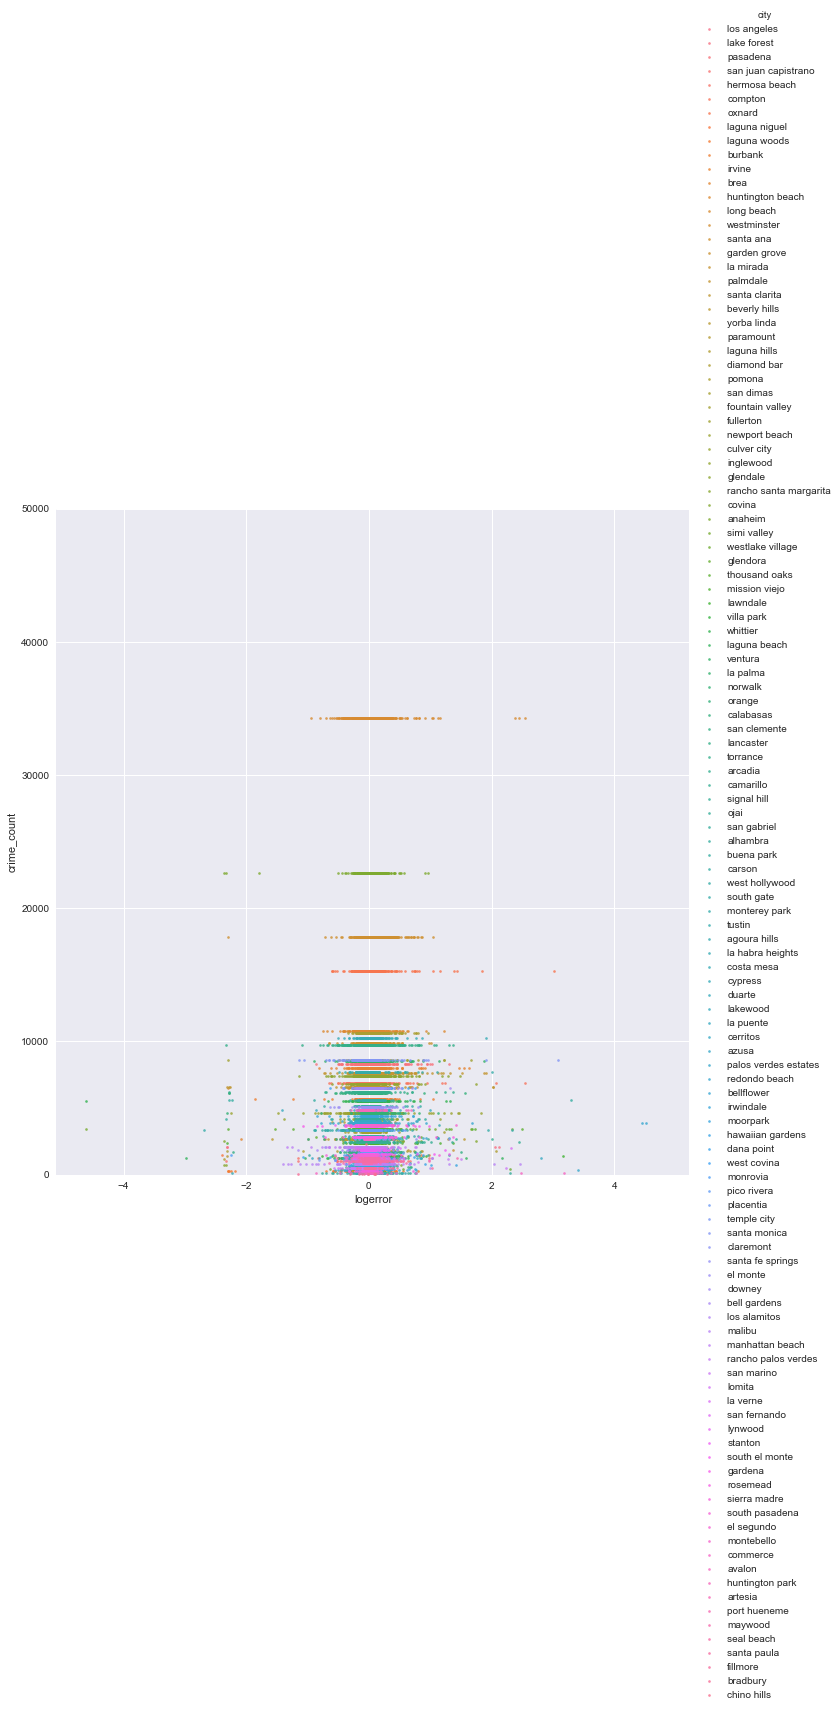

In [15]:
features = ['logerror', 'crime_count', 'city']
X = train_df[features]
X = X.dropna()
g = sns.lmplot(y = "crime_count", x = "logerror", hue="city", data = X, size = 10, fit_reg = False, scatter_kws={"s":7})
g.set(ylim = (0, 50000))

#### It can be seen from the above graph that for the cities having higher crime count the log error tends to be closer to 0 (i.e. the variance is lesser)

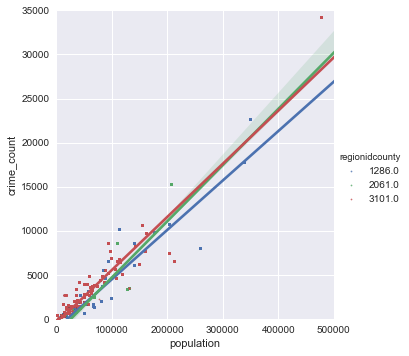

In [18]:
features = ['population', 'crime_count', 'regionidcounty']
X = train_df[features]
X = X.dropna()
g = sns.lmplot(y = "crime_count", x = "population", hue="regionidcounty", data = X, size = 5, fit_reg = True, scatter_kws={"s":3})
g.set(ylim = (0, 35000))
g.set(xlim = (0, 500000))

#### The above graph shows that as the population of the city increases, the crime count also increases as expected.

In [20]:
sp.stats.pearsonr(X.population.dropna(), X.crime_count.dropna())

(0.99971112491793623, 0.0)

#### We found the correlation between the population and crime_count to be very high, Hence, we chose to include only crime_count in our prediction model.

### Building a prediction model and training it on the merged dataset containing properties along with crime data, created in Question 4

In [39]:
#Reads the merged dataset from Question4
properties = pd.read_csv('./properties_2016_city_crime_population.csv')

In [40]:
#Training dataframe
train_df = pd.read_csv('/Users/charuta/Documents/SBU/Academics/Semester_1/Data_Science/Homework_3/train_2016_v2.csv')
train_df = pd.merge(train_df, properties, on='parcelid', how='left')

In [41]:
#Testing dataframe
test_df = pd.read_csv('/Users/charuta/Documents/SBU/Academics/Semester_1/Data_Science/Homework_3/sample_submission.csv') 
test_df = test_df.rename(columns={'ParcelId': 'parcelid'})
test_df = test_df.merge(properties, how='left', on='parcelid')

### We decided to use the attributes calculatedfinishedsquarefeet, bedroomcnt and crime_count as their correlation with log error was high

In [42]:
#Testing features
test_attributes = test_df[['calculatedfinishedsquarefeet', 'bedroomcnt', 'crime_count']]

### We replaced missing values with 0 for bedroomcnt, mean for calculatedfinishedsquarefeet, and median for crime_count
#### We chose these values because:
#### The mode of bedroomcnt is 0
#### The mean of calculatedfinishedsquarefeet is appropriate due to the evenly distributed nature of values
#### The median of crime_count is appropriate due to the presence of highly extreme values in particular cities, which affects the mean

In [43]:
#Preprocessing on testing features
test_attributes['bedroomcnt'].fillna(0, inplace=True)
test_attributes['calculatedfinishedsquarefeet'].fillna((test_attributes['calculatedfinishedsquarefeet'].mean()), inplace=True)
test_attributes['crime_count'].fillna((test_attributes['crime_count'].median()), inplace=True)

/Users/charuta/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


### We implemented Lasso Regression, to regularize the data so that it doesn't overfit. (Also tried in Homework 2).

In [11]:
#Training
X = train_use.ix[:, train_use.columns != 'logerror']
y = train_use.ix[:, train_use.columns == 'logerror']

X_use = np.matrix(X)
y_use = np.matrix(y)

#Splits train and test dataframe
X_train, X_test, y_train, y_test = train_test_split(X_use, y_use, test_size = 0.05, random_state = 0)

# Lasso Regression
regressor = linear_model.Lasso(alpha = 0.1)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("Mean Squared Error = ", sklearn.metrics.mean_squared_error(y_test, y_pred))
print("          R2 score = ", sklearn.metrics.r2_score(y_test, y_pred))
print("lasso_regression coefficients: ", regressor.coef_)
print("intercept: ", regressor.intercept_)

Mean Squared Error =  0.0270332593279
          R2 score =  -0.000892573469253
lasso_regression coefficients:  [  6.65402947e-06   0.00000000e+00  -1.25604203e-08]
intercept:  [ 0.00031896]


#### We found that this model gave a better mean squared error than linear regression model but also gave a negative r2 score. Hence, we decided to use linear regression prediction model to submit on Kaggle.

### Training the linear regression model and predicting values for Kaggle

In [44]:
train_df['bedroomcnt'].fillna(0, inplace=True)
train_df['calculatedfinishedsquarefeet'].fillna((train_df['calculatedfinishedsquarefeet'].mean()), inplace=True)
train_df['crime_count'].fillna((train_df['crime_count'].median()), inplace=True)

train_use = train_df[['calculatedfinishedsquarefeet', 'bedroomcnt', 'crime_count', 'logerror']]

X = train_use.ix[:, train_use.columns != 'logerror']
y = train_use.ix[:, train_use.columns == 'logerror']

X_use = np.matrix(X)
y_use = np.matrix(y)

X_train = X_use
y_train = y_use

#Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


#Prediction (Testing)
X_test = np.matrix(test_attributes)
y_pred = regressor.predict(X_test)

/Users/charuta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


In [45]:
sample_file = pd.read_csv('/Users/charuta/Documents/SBU/Academics/Semester_1/Data_Science/Homework_3/sample_submission.csv')

In [46]:
#Creates the final submission file
sample_file['201610'] = y_pred
sample_file['201710'] = y_pred

sample_file['201611'] = y_pred
sample_file['201711'] = y_pred

sample_file['201612'] = y_pred
sample_file['201712'] = y_pred

print('Preparing the csv file ...')
sample_file.to_csv('predicted_results_CND_2016_2.csv', index=False)
print("Finished writing the file")

Preparing the csv file ...
Finished writing the file


# Question 6

In [5]:
#Reads the merged dataset from Question4
properties = pd.read_csv('./properties_2016_city_crime_population.csv')

#Training dataframe
train_df = pd.read_csv('/Users/charuta/Documents/SBU/Academics/Semester_1/Data_Science/Homework_3/train_2017.csv')
train_df = pd.merge(train_df, properties, on='parcelid', how='left')

In [3]:
#Feature selection
train_df2 = train_df.dropna(subset = ['calculatedfinishedsquarefeet', 'bedroomcnt', 'crime_count'])
train_use = train_df2[['calculatedfinishedsquarefeet', 'bedroomcnt', 'crime_count', 'logerror']]

In [7]:
#Training
X = train_use.ix[:, train_use.columns != 'logerror']
y = train_use.ix[:, train_use.columns == 'logerror']

X_use = np.matrix(X)
y_use = np.matrix(y)

#Splits train and test dataframe
X_train, X_test, y_train, y_test = train_test_split(X_use, y_use, test_size = 0.05, random_state = 0)

#Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

#Stores the baseError prediction for future comparisons
baseError = sklearn.metrics.mean_squared_error(y_test, y_pred)

print("Mean Squared Error = ", sklearn.metrics.mean_squared_error(y_test, y_pred))
print("          R2 score = ", sklearn.metrics.r2_score(y_test, y_pred))

Mean Squared Error =  0.0338089150366
          R2 score =  0.00107681417878


/Users/charuta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


### Permuting the log error values of the test set, and calculating the ratio of number of times the result after permuting log error was better than the result without permuting, to the total number of permutations (i.e. P-value)

#### Permuting 500 times

In [66]:
#Calculates p-value for 500 permutations
count_bad = 0.0
count_good = 0.0
for i in range(0, 500):
    np.random.shuffle(y_test)
    if baseError < sklearn.metrics.mean_squared_error(y_test, y_pred):
        count_bad += 1
    else:
        count_good += 1
        
#Percentage score of p-value test
print(count_good / (count_good + count_bad))

0.006


#### Permuting 1000 times

In [67]:
#Calculates p-value for 1000 permutations
count_bad = 0.0
count_good = 0.0
for i in range(0, 1000):
    np.random.shuffle(y_test)
    if baseError < sklearn.metrics.mean_squared_error(y_test, y_pred):
        count_bad += 1
    else:
        count_good += 1
        
#Percentage score of p-value test
print(count_good / (count_good + count_bad))

0.009


#### Permuting 100 times

In [8]:
#Calculates p-value for 100 permutations
count_bad = 0.0
count_good = 0.0
for i in range(0, 100):
    np.random.shuffle(y_test)
    if baseError < sklearn.metrics.mean_squared_error(y_test, y_pred):
        count_bad += 1
    else:
        count_good += 1
        
#Percentage score of p-value test
print(count_good / (count_good + count_bad))

0.0
